In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(r'C:\Users\salgueir\Pictures/zucchini.jpg')
# Convert Image to HSV color space
im_channels = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
im_channels = cv2.GaussianBlur(im_channels, (5, 5), 0)
z = im_channels.reshape((-1, 3))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [32]:
im_channels.dtype

dtype('uint8')

In [3]:
label

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [4]:
z.shape

(8838000, 3)

In [5]:
label.shape

(8838000, 1)

In [6]:
label.reshape(im_channels.shape[:2])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [7]:
max(label)

array([1], dtype=int32)

In [8]:
label.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [9]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(im_channels.shape)

In [10]:
res.shape

(8838000, 3)

In [11]:
res2.shape

(2946, 3000, 3)

In [12]:
im_channels.shape

(2946, 3000, 3)

In [13]:
v2d = label.reshape(im_channels.shape[:2])

In [14]:
v2d.shape

(2946, 3000)

In [15]:
ret

22860005092.538338

In [16]:
ar = np.where(v2d == 0)

In [17]:
ar.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [18]:
print(max(ar[0]), min(ar[0]))

2945 0


In [19]:
print(max(ar[1]), min(ar[1]))

2999 0


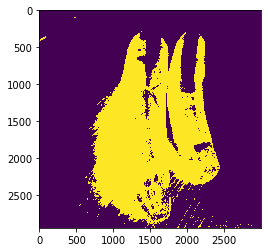

In [20]:
fig = plt.figure()
plt.imshow(v2d)
plt.show()

In [21]:
def erosion(img, kernel_size, iterations):
	kernel = np.ones((kernel_size, kernel_size), np.uint8)
	erosion = cv2.erode(img, kernel, iterations=iterations)
	return erosion

In [51]:
v2d2 = np.uint8(v2d)
print(v2d2.shape)
print(v2d2.dtype)

(2946, 3000)
uint8


In [52]:
print(im_channels[:,:,2].shape)
print(im_channels[:,:,2].dtype)

(2946, 3000)
uint8


In [78]:
v2d2_eroded = erosion(v2d2, 25, 1)

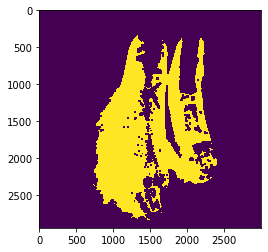

In [79]:
fig = plt.figure()
plt.imshow(v2d2_eroded)
plt.show()

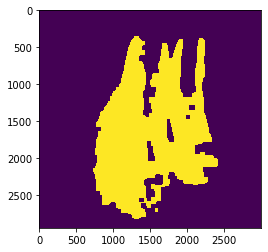

In [92]:
kernel_size = 50
kernel = np.ones((kernel_size, kernel_size), np.uint8)
v2d2_oc = cv2.morphologyEx(v2d2, cv2.MORPH_OPEN, kernel)
v2d2_oc = cv2.morphologyEx(v2d2_oc, cv2.MORPH_CLOSE, kernel)
fig = plt.figure()
plt.imshow(v2d2_oc)
plt.show()

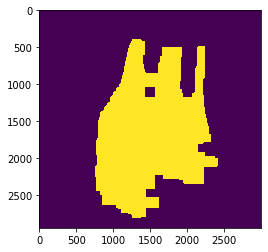

In [96]:
kernel_size = 100
kernel = np.ones((kernel_size, kernel_size), np.uint8)
v2d2_co = cv2.morphologyEx(v2d2_oc, cv2.MORPH_CLOSE, kernel)
v2d2_co = cv2.morphologyEx(v2d2_co, cv2.MORPH_OPEN, kernel)
fig = plt.figure()
plt.imshow(v2d2_co)
plt.show()

In [83]:
v2d2_oc[2000, 1000]

1

In [23]:
label.shape

(8838000, 1)

In [24]:
label.index(1)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [29]:
indices = np.nonzero(v2d == 1)

In [30]:
len(indices[0])

2686756

In [97]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(v2d2_co)

In [98]:
nlabels

2

In [99]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [100]:
stats

array([[      0,       0,    3000,    2946, 6339329],
       [    758,     389,    1657,    2420, 2498671]], dtype=int32)

In [101]:
centroids

array([[1493.0480371 , 1403.78822711],
       [1515.86914804, 1646.82728619]])

In [106]:
stats[:, cv2.CC_STAT_AREA]

array([6339329, 2498671], dtype=int32)

In [108]:
area_order = np.sort(stats[:, cv2.CC_STAT_AREA])

In [111]:
area_order[-2]

2498671

In [113]:
area_value_kernel = np.sort(stats[:, cv2.CC_STAT_AREA])[-2]
print(area_value_kernel)

2498671


In [127]:
stats[np.where(stats[:, cv2.CC_STAT_AREA] == area_value_kernel), :]

array([[[    758,     389,    1657,    2420, 2498671]]], dtype=int32)

In [134]:
stats[np.where(stats[:, cv2.CC_STAT_AREA] == area_value_kernel), :].flatten()

array([    758,     389,    1657,    2420, 2498671], dtype=int32)

In [135]:
bb = stats[np.where(stats[:, cv2.CC_STAT_AREA] == area_value_kernel), :].flatten()

In [140]:
tuple(bb[[cv2.CC_STAT_LEFT, cv2.CC_STAT_TOP]])

(758, 389)

In [130]:
bb.reshape(5)

array([    758,     389,    1657,    2420, 2498671], dtype=int32)

In [132]:
bb.flatten()

array([    758,     389,    1657,    2420, 2498671], dtype=int32)

In [143]:
bb[[cv2.CC_STAT_LEFT, cv2.CC_STAT_TOP]] + bb[[cv2.CC_STAT_WIDTH, cv2.CC_STAT_HEIGHT]]

array([2415, 2809], dtype=int32)

## Peak

In [222]:
import cv2
import numpy as np
# Read image
image = cv2.imread(r'C:\Users\salgueir\Pictures/zucchini.jpg')
# Resize image
image = cv2.resize(image, (224, 224))
# Convert Image to HSV color space
im_channels = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
im_channels = cv2.GaussianBlur(im_channels, (5, 5), 0)

In [214]:
def hist3d(img, intervals):
	space = np.linspace(0, 1, intervals+1)
	h3d = np.zeros((intervals, intervals, intervals))
	for n in range(img.shape[0]):
		for m in range(img.shape[1]):
			tmpVal1 = img[n, m, 0]
			tmpVal2 = img[n, m, 1]
			tmpVal3 = img[n, m, 2]
			idxVal1 = 0
			idxVal2 = 0
			idxVal3 = 0
			for i in range(intervals):
				if i == intervals:
					if ((tmpVal1 >= space[i]) and (tmpVal1 <= space[i+1])):
						idxVal1 = i
						break
				else:
					if ((tmpVal1 >= space[i]) and (tmpVal1 < space[i+1])):
						idxVal1 = i
						break
			for i in range(intervals):
				if i == intervals:
					if ((tmpVal2 >= space[i]) and (tmpVal2 <= space[i+1])):
						idxVal2 = i
						break
				else:
					if ((tmpVal2 >= space[i]) and (tmpVal2 < space[i+1])):
						idxVal2 = i
						break
			for i in range(intervals):
				if i == intervals:
					if ((tmpVal3 >= space[i]) and (tmpVal3 <= space[i+1])):
						idxVal3 = i
						break
				else:
					if ((tmpVal3 >= space[i]) and (tmpVal3 < space[i+1])):
						idxVal3 = i
						break
			h3d[idxVal1, idxVal2, idxVal3] = h3d[idxVal1, idxVal2, idxVal3] + 1
	return h3d

In [215]:
def normalizeHSV(rawHSV):
	# For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].
	normalized = np.empty(rawHSV.shape)
	normalized[:, :, 0] = rawHSV[:, :, 0]/179.0
	normalized[:, :, 1] = rawHSV[:, :, 1]/255.0
	normalized[:, :, 2] = rawHSV[:, :, 2]/255.0
	return normalized

In [216]:
def findPeak4D(h3d, width):
    peaks = np.empty((0,4),int)
    for i in range(width,h3d.shape[0]-width):
        for j in range(width,h3d.shape[1]-width):
            for k in range(width,h3d.shape[2]-width):
                pattern = h3d[i-width:i+width+1,j-width:j+width+1,k-width:k+width+1]
                val = 6*pattern[1,1,1] - pattern[1,1,0] - pattern[1,1,2] - pattern[0,1,1] - pattern[1,0,1] -pattern[1,2,1] - pattern[2,1,1]
                # Afegir que el valor maxim sigui al pla mitj
                if val>0:
                    peaks = np.vstack((peaks,[i,j,k,val]))
    return peaks

In [223]:
im_norm = normalizeHSV(im_channels)

In [228]:
h3d = hist3d(im_norm, 15)

In [229]:
h3d.shape

(15, 15, 15)

In [244]:
p4d = findPeak4D(h3d, 5)

In [245]:
p4d.shape

(28, 4)

In [194]:
print(p4d)

[[11. 12. 14.  2.]
 [11. 14. 14.  9.]
 [13. 14. 14.  6.]
 [14. 12. 14.  5.]
 [14. 13. 14.  5.]]


In [195]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = len(p4d)
# Sort every channel in a single column
z = im_channels.reshape((-1, 3))
# convert to np.float32
z = np.float32(z)
ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [196]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]

In [197]:
res2 = res.reshape(im_channels.shape)

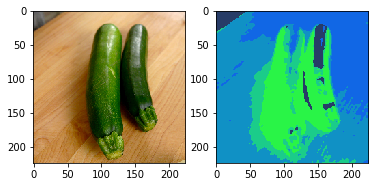

In [198]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax2.imshow(res2)
plt.show()

In [199]:
label.shape

(50176, 1)

In [200]:
z[label.flatten() == 0].mean(axis=0)

array([ 27.819769, 204.9306  , 138.51688 ], dtype=float32)

In [201]:
z[label.flatten() == 0,0].mean()

27.819769

In [202]:
sensitivity = 20
lower_green = np.array([60 - sensitivity,100,100])
upper_green = np.array([60 + sensitivity,255,255])
cluster_mean = np.ndarray((k, 3))
for i in range(k):
    cluster_mean[i] = z[label.flatten() == i].mean(axis=0)
# mask = cv2.inRange(cluster_mean, lower_green, upper_green)
# plt.imshow(mask)
# plt.show()

In [203]:
def in_range(clusters, lower, upper):
	res = np.logical_and(np.logical_and(lower[0] <= clusters[:, 0],  clusters[:, 0] <= upper[0]),
						 np.logical_and(lower[1] <= clusters[:, 1],  clusters[:, 1] <= upper[1]),
						 np.logical_and(lower[2] <= clusters[:, 2],  clusters[:, 2] <= upper[2]))
	return res

In [204]:
green_clus = in_range(cluster_mean, lower_green, upper_green)

In [205]:
cluster_mean

array([[ 27.81976891, 204.93060303, 138.51687622],
       [ 39.26270676,  60.80902481, 103.28456116],
       [ 41.1939621 , 244.44963074,  71.71169281],
       [ 17.02264595, 103.25896454, 229.28829956],
       [ 16.49122238, 145.91505432, 197.96946716]])

In [206]:
green_clus

array([False, False,  True, False, False])

In [207]:
idx = np.nonzero(green_clus)

In [208]:
idx

(array([2], dtype=int64),)

In [209]:
label.flatten()

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [210]:
mask = np.isin(label.flatten(), idx)

In [211]:
bin_im = mask.reshape((224, 224))

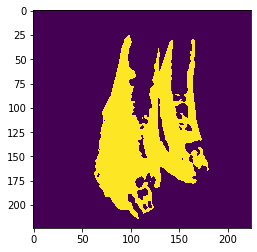

In [212]:
plt.imshow(bin_im)
plt.show()